# Estimates of $G$ for channel flow and plumes

In **channel flows** for which the generation and dissipation of turbulent kinetic energy are in balance, the log-law can be used to estimate the dissipation rate profile:

$$
\frac{\epsilon h}{u_{*}^3}=\frac{1-\zeta}{\kappa \zeta}
$$

where $\epsilon$ is the dissipation rate, $h$ is the flow depth, $u_*$ is the friction or shear velocity, $\kappa$ is the von Karman constant, and $\zeta$ is the scaled vertical coordinate, $\zeta = z/h$. The turbulent shear rate, $G$, is related to the dissipation rate and the Kolmogorov microscale, $\eta$, as follows:

$$
G=\frac{\nu}{\eta^2}=\sqrt{\frac{\epsilon}{\nu}}
$$

where $\nu$ is the kinematic viscosity of the fluid. Using these two equations we can write an expression for the depth-varying turbulent shear rate, $G=G(\zeta)$ as:

$$
G =\left[\frac{u_{*}^3}{\nu \kappa h }\left(\frac{1-\zeta}{\zeta}\right)\right]^{1/2}
$$

Below are estimate of $G=G(\zeta)$ along with the depth or layer-averaged value of $\widetilde{G}$. We will refer to this method as Method 1. 


Another way to estimate $G$ is simply to say that $\epsilon \propto u_*^3$. If $u_* \propto U_{avg}$, where $U_{avg}$ is some layer averaged velocity, then one can take $\widetilde{G} \propto \sqrt{|U_{avg}^3|/\nu}$. Based on a this-seems-reasonable analysis with some data from an estuary, one can suggest a second method for calculating $\widetilde{G}$:

$$
\widetilde{G} = 0.05 \sqrt{\frac{|U_{avg}^3|}{\nu}}
$$

This last equation will be referred to as Method 2.

## Imports and function definitions

In [3]:
# Imports
%pylab inline
%config InlineBackend.figure_format='retina' # hig-res plots for a Retina display

def density(To,Sppt):
    rho_fresh=1000*(1-(To +288.9414)/(508929.2*(To+68.12963))*(To-3.9863)**2)
    Acoef = 0.824493 - 0.0040899*To + 0.000076438*To**2 -0.00000082467*To**3 + 0.0000000053675*To**4
    Bcoef = -0.005724 + 0.00010227*To - 0.0000016546*To**2
    return rho_fresh + Acoef*Sppt + Bcoef*Sppt**(3/2) + 0.00048314*Sppt**2

def visc(To):
    return 2.7488e-07+1.4907e-06*exp(-0.034812*To)

Populating the interactive namespace from numpy and matplotlib


## Estimates of $G$

Depth averaged G [Hz], method 1 = 12.7
Depth averaged G [Hz], method 2 = 39.9


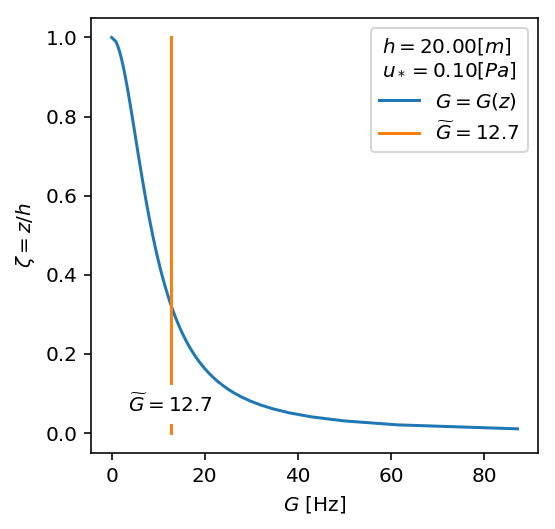

In [4]:
"""
User input --------------------------------------------------------
"""
h= 20                 # depth in meters
Uavg = 1.0            # layer averaged velocity in m/s       
To = 4                # temperature in degC
Sppt = 35             # salinity in parts per thousand 
kappa = 0.41            # von Karman constant

"""
Calculations ----------------------------------------------------
"""

ustar = 0.1*Uavg      #shear velocity in m/s
rho = density(To,Sppt)
nu = visc(To)

G=linspace(0,1,100)
zeta=linspace(0,1,100)
mask=arange(99)
mask=mask+1
dzeta=zeta[1]-zeta[0]

G[1:]=((ustar**3/(kappa*nu*h))*(1-zeta[1:])/zeta[1:])**(1/2)

int_G = sum(dzeta*G[1:])/(1-zeta[1])
int_G2 = 0.05*sqrt(Uavg**3/nu)

print ('Depth averaged G [Hz], method 1 =', around(int_G, decimals=1))
print ('Depth averaged G [Hz], method 2 =', around(int_G2, decimals=1))

"""
Plot ----------------------------------------------------
"""

zeta2=linspace(0,1,2)
Gavg=linspace(0,1,2)
Gavg[:]=int_G

textstr = '$h = %.2f [m]$\n$u_* = %.2f [Pa]$'%(h, ustar)
textstr2 = r'$\widetilde{G}=%.1f$'%(int_G)

fig, ax = plt.subplots(figsize=(4,4))
ax.plot(G[mask],zeta[mask], label =r'$G=G(z)$')
ax.plot(Gavg,zeta2, label =textstr2)
ax.set_xlabel('$G$ [Hz]')
ax.set_ylabel('$\zeta=z/h$')
legend(title=textstr)
props = dict(facecolor='white',edgecolor='none', alpha=1)
text(int_G, 0.1, textstr2, verticalalignment='top', horizontalalignment='center', bbox=props);